In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
netflix = pd.read_csv("netflix_titles.csv")
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [15]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [16]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
dtype: int64

In [27]:
netflix['year_added'] = netflix["date_added"].dt.year

In [21]:
years_count = pd.crosstab(netflix["year_added"], columns='count')
years_count

col_0,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,24
2015.0,82
2016.0,429


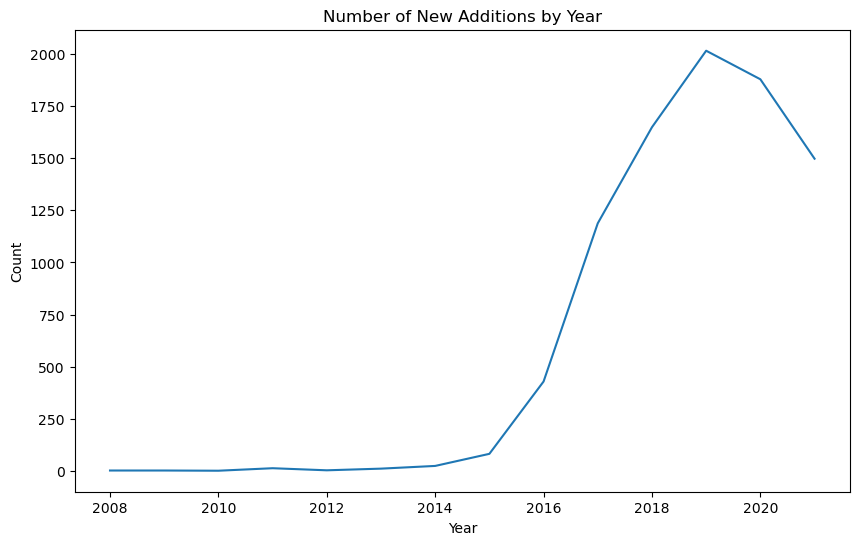

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sorted(netflix[netflix['year_added'].notna()]['year_added'].unique()), years_count['count'])
ax.set_title("Number of New Additions by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

In [34]:
len(netflix["country"].unique())

749

In [35]:
netflix["country"].head(10)

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [36]:
netflix['country_list'] = netflix['country'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

In [37]:
netflix["country_list"].head(10)

0                                      [United States]
1                                       [South Africa]
2                                                   []
3                                                   []
4                                              [India]
5                                                   []
6                                                   []
7    [United States, Ghana, Burkina Faso, United Ki...
8                                     [United Kingdom]
9                                      [United States]
Name: country_list, dtype: object

In [41]:
np.mean([len(s) for s in netflix["country_list"]])

1.1370500738049278

In [47]:
all_countries = []
for i in range(0, len(netflix['country_list'])):
    all_countries += netflix['country_list'][i]
all_countries = pd.Series(all_countries)

In [51]:
countries_count = all_countries.value_counts().reset_index()
countries_count.columns = ['Country', 'Count']

In [52]:
countries_count

,Country,Count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Bermuda,1
123,Ecuador,1
124,Armenia,1
125,Mongolia,1


In [53]:
top_10_countries = countries_count.head(10)

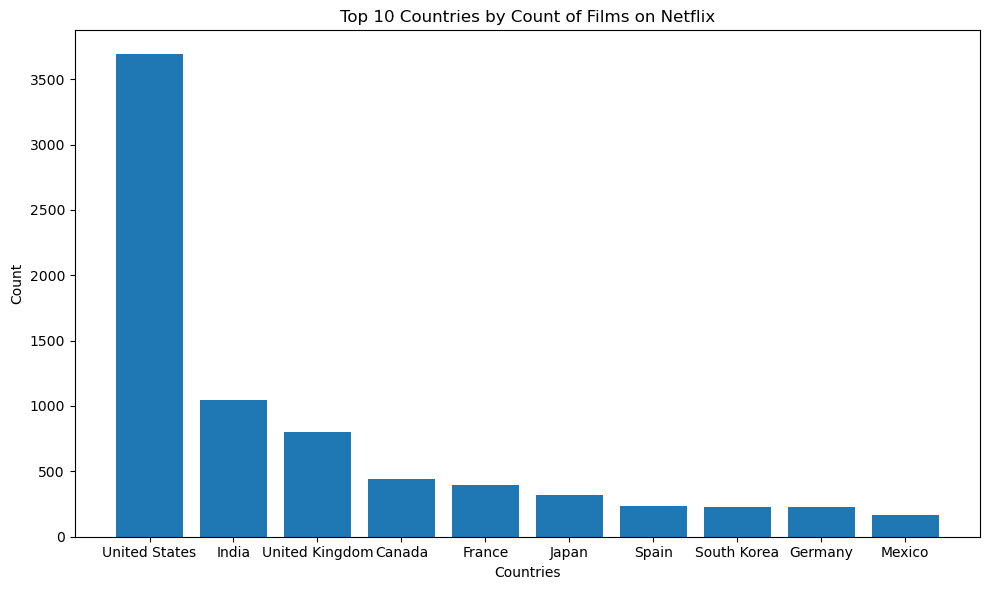

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_countries['Country'], top_10_countries['Count'])
ax.set_title("Top 10 Countries by Count of Films on Netflix")
ax.set_ylabel("Count")
ax.set_xlabel("Countries")
plt.tight_layout()
plt.show()

In [60]:
type_count = pd.crosstab(netflix['type'], columns = 'count')
type_count['percent'] = type_count['count']/len(netflix)

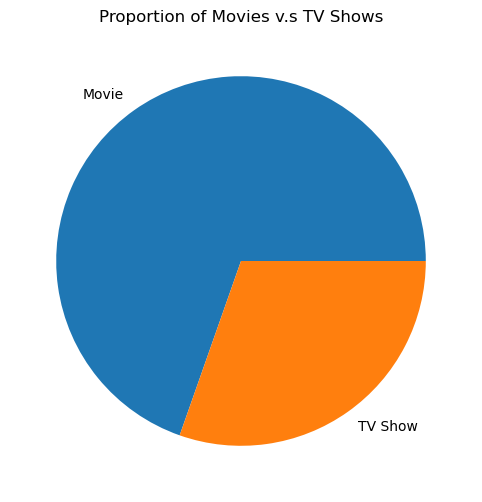

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(type_count['percent'], labels=netflix['type'].unique())
ax.set_title("Proportion of Movies v.s TV Shows")
plt.show()